In [8]:
from GraphManager import GraphManager
from firebase_admin import credentials
import as_graph

# Configuration

For the `optimization_weight` parameter:

* `0` - sensible_default_weights

```python
np.array([
    -6., -6., -6., -6., -6., -6.,
    18, 18, 0, 0, 0, 0,
    0., 0., 0., -1, 1e2, -1
])
```

* `1` - trust_odom

```python
np.array([
    -3., -3., -3., -3., -3., -3.,
    10.6, 10.6, 10.6, 10.6, 10.6, 10.6,
    0., 0., 0., -1, -1, 1e2
]),
```

* `2` - trust_tags

```python
np.array([
    10, 10, 10, 10, 10, 10,
    -10.6, -10.6, -10.6, -10.6, -10.6, -10.6,
    0, 0, 0, -1e2, 3, 3
]),
```

* `3` - new_option

```python
np.array([
    -6., -6., -6., -6., -6., -6.,  # Translation + rotation
    1, 1, 0, 0, 0, 0,  # first 2 = x and y pixels, rest are unused during SBA
    0., 0., 0., -1, 1e2, -1  # dummy nodes (roll, yaw, pitch)
])
```

To interpret the weight vectors:

```python
np.array([
    a, b, c, d, e, f,
    g, h, i, j, k, l,
    m, n, o, p, q, r
])
```

* Values `a`-`f` correspond to translation and rotation respectively
* Values `g`-`h` correspond to `x` and `y` pixel coordinates of tags
* Values `i`-`l` correspond to sparse bundle adjustment (SBA) parameters
* Values `m`-`r` correspond to translation and rotation of dummy nodes

The weights are provided to the graph object (an instance of the `Graph` class) in the `GraphManager._optimize_graph`  instance method; in the `Graph` object, the weights are then stored in the `Edge` objects' information attribute as  diagonal matrices created from weight vectors (see the `Graph.update_edges` instance method). Note that the weights are applied as a negated exponent:

$\text{Edge}_\text{information} = \text{Diag}\left(e^{-\text{weights}}\right)$

where $\text{Diag}$ represents the `np.diag` function. Therefore, low weight values correspond to high importance, and vice versa.

In [9]:
optimization_weight = 0

# 0: Sparse bundle adjustment
# 1: Tag prescaling uses the full covariance matrix
# 2: Tag prescaling uses only the covariance matrix diagonal
# 3: Identity prescaling (tag prescaling is a matrix of ones)
prescaling_opt = 0

# If true, then download and cache the unprocessed maps from Firebase
refresh_cache = False

# JSON files in the cache that match this pattern are loaded by the GraphManager
map_pattern = "unprocessed_maps/**/*Part 2!*"

# Show plots if true
visualize = True

# Location of Firebase credentials
credentials_loc = "/home/duncan/.secret/invisible-map-firebase-adminsdk-s924m-de6e08b695.json"

# Set up the graph manager
cred = credentials.Certificate(credentials_loc)
graph_manager = GraphManager(optimization_weight, cred, prescaling_opt)
if refresh_cache:
    graph_manager.firebase_listen()

# Gallery

## Lone Graph Optimization

*(non-comparative optimization routine)*

### SBA

#### Default weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 0.03087759712924069
checking optimized edges
Total chi2: 0.010251727748317507
tag_vertex_shift [[ 0.21298457  0.03785792 -0.06869707 -0.00673554 -0.00585316 -0.00265728
  -0.00712266  0.        ]
 [ 0.24946025  0.04060123 -0.09354915 -0.00297111  0.01823825  0.00746718
   0.00185238  0.        ]
 [ 0.2255851  -0.07608166  0.32885919 -0.02032476 -0.30024799 -0.01269331
   0.01445567  0.        ]
 [ 0.39184134 -0.03019083 -0.11612246 -0.00466845 -0.09700385  0.00653962
   0.09127833  0.        ]
 [-0.04040555  0.02643356 -0.08231886 -0.00794324  0.00668921  0.00149795
   0.00057504  0.        ]]


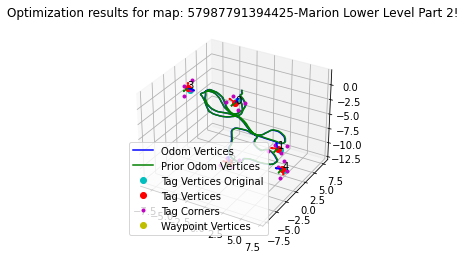

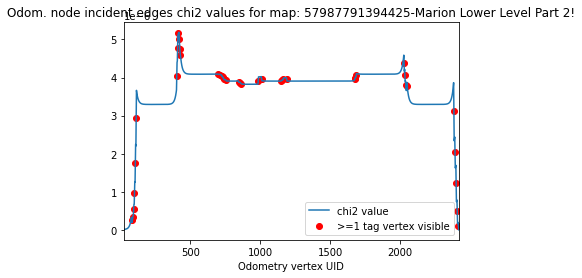

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [10]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=0, new_weights_specifier=0)

#### Prioritizing odometry nodes


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 50.51526813912468
checking optimized edges
Total chi2: 0.03359380919985673
tag_vertex_shift [[ 1.75787257e-01  1.47480063e-01  1.27809477e-01 -3.93938692e-03
  -6.16628452e-03 -1.03568380e-03 -7.55111931e-03  0.00000000e+00]
 [ 2.43229380e-01  1.46868237e-01  1.12391486e-01 -7.25117840e-03
  -1.83907351e-03  5.99547238e-03 -1.72650178e-04  0.00000000e+00]
 [-1.38645336e-03  7.41195350e-04 -6.92511935e-03 -1.62653159e-02
   4.48536693e-04 -1.20898761e-03  1.85594734e-04  0.00000000e+00]
 [-4.88427286e-02  2.07663069e-02  1.04417235e-01  2.93095366e-03
   1.24212177e-02 -6.04863690e-04 -1.00527671e-02  0.00000000e+00]
 [-8.41052739e-03  1.23086185e-01  1.62486754e-01 -7.75223929e-03
   4.24607489e-03  2.37641164e-03  3.73841607e-04  0.00000000e+00]]


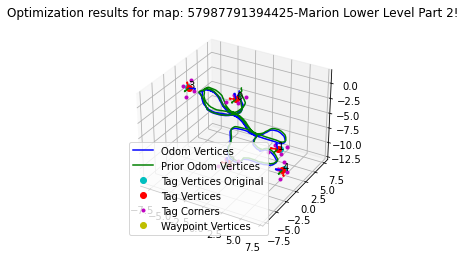

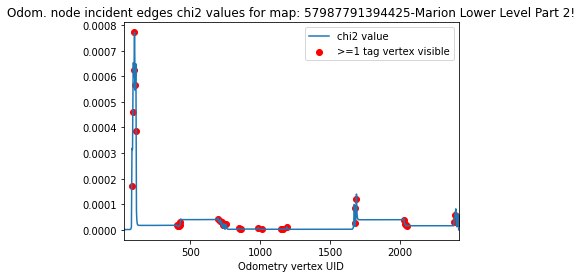

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [11]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=0, new_weights_specifier=1)

#### Prioritizing tag weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 22084010214839.234
checking optimized edges
Total chi2: 21215278477170.59
tag_vertex_shift [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


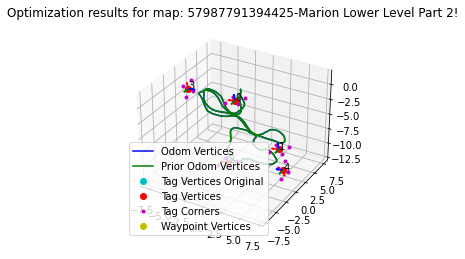

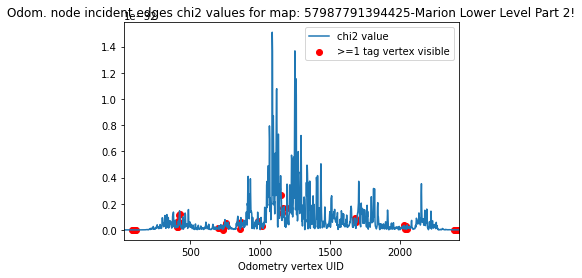

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [12]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=0, new_weights_specifier=2)

#### New weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 745846.8998007412
checking optimized edges
Total chi2: 36.21957042857052
tag_vertex_shift [[ 8.27119215e-02  4.72027188e-02  1.78739759e-01 -6.86129058e-03
  -1.47592778e-02 -2.91275817e-03 -1.78497083e-02  0.00000000e+00]
 [ 1.56867776e-01  4.35799557e-02  2.34170975e-01 -6.41943125e-03
  -3.13901242e-02  5.37297741e-03 -2.44432253e-03  0.00000000e+00]
 [-1.51046478e-01  4.20343696e-03 -1.03191206e-01 -1.35944996e-02
   2.25351793e-03 -3.13625925e-03  3.15328556e-04  0.00000000e+00]
 [-4.54334080e-01 -6.14930615e-03 -2.78740666e-01 -4.93357484e-04
  -4.75079860e-02  1.40760386e-04  4.16516366e-02  0.00000000e+00]
 [-3.33065133e-02  2.04910982e-02  1.59813444e-02 -8.25665158e-03
  -1.06742763e-02  1.39869546e-03 -7.30422608e-04  0.00000000e+00]]


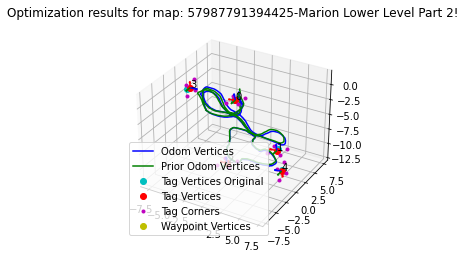

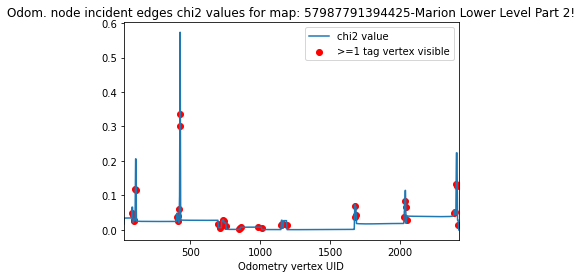

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [13]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=0, new_weights_specifier=3)

### Full Covariance Prescaling

#### Default weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 211428.03550919873
checking optimized edges
Total chi2: 41.12599026381288
tag_vertex_shift [[ 3.50106999e-02  5.31218437e-01  3.23571483e-01 -3.08239150e-03
  -3.32852512e-03  3.17865546e-03 -4.03895867e-03  0.00000000e+00]
 [-7.59220661e-02  1.95250309e-01 -5.75376768e-02 -2.86891975e-04
  -5.16168938e-03  7.07631945e-03 -4.93857790e-04  0.00000000e+00]
 [-2.78796004e-02 -1.07439794e-01  8.48493836e-03 -1.75568295e-04
   1.06146149e-02 -2.20981068e-03  1.13675407e-03  0.00000000e+00]
 [-1.86173699e-02  1.37002700e+00 -6.82579872e-01 -1.56316900e-02
  -1.98064061e-02 -1.10255421e-02  1.70975035e-02  0.00000000e+00]
 [ 3.34779658e-01  4.37264436e-01  1.50213284e-01 -1.10920075e-03
   9.28875440e-03  1.04031225e-02  8.28871691e-04  0.00000000e+00]]


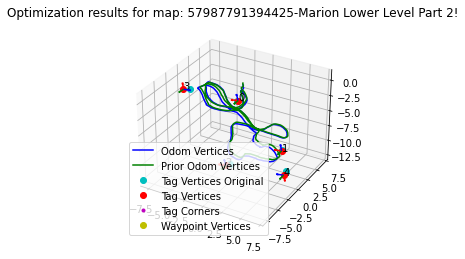

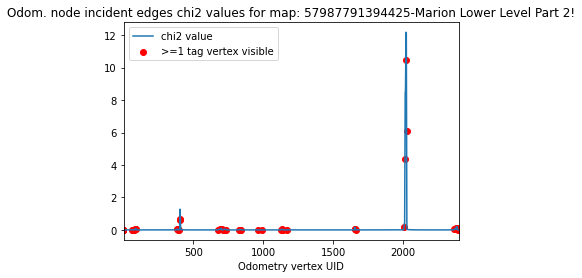

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [14]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=1, new_weights_specifier=0)

#### Prioritizing odometry nodes


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 117.74451171272517
checking optimized edges
Total chi2: 0.06076328800794977
tag_vertex_shift [[ 0.09883555  0.0925193   0.06845459 -0.00078166 -0.00562368  0.00373112
  -0.00688191  0.        ]
 [ 0.15211728  0.09195742  0.04859062  0.00096955 -0.0039776   0.00455035
  -0.00038438  0.        ]
 [ 0.00165687  0.00550242 -0.00152426 -0.00165992  0.003649   -0.00490647
   0.00034699  0.        ]
 [-0.04533571  0.07133589  0.08780521 -0.003353    0.01055178 -0.00233315
  -0.00851904  0.        ]
 [-0.05170445  0.08652381  0.12457344 -0.00100021  0.00376294  0.00152357
   0.00030162  0.        ]]


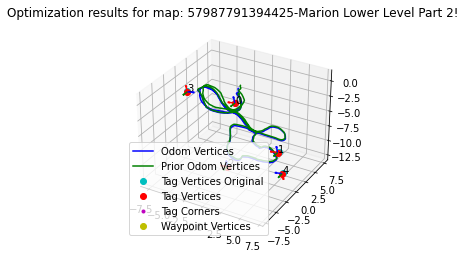

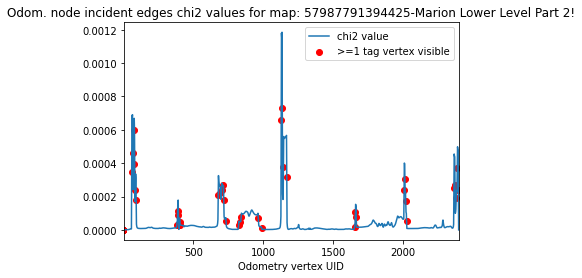

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [15]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=1, new_weights_specifier=1)

#### Prioritizing tag weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 554159807469.6307
checking optimized edges
Total chi2: 257121522208.60074
tag_vertex_shift [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.67361738e-19
   1.11022302e-16  1.73472348e-18  1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.38777878e-17  8.67361738e-19  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.16840434e-19
  -2.77555756e-17 -3.46944695e-18  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.71050543e-20
  -1.38777878e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


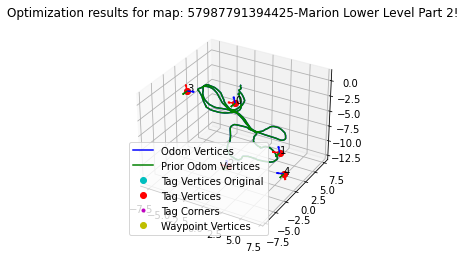

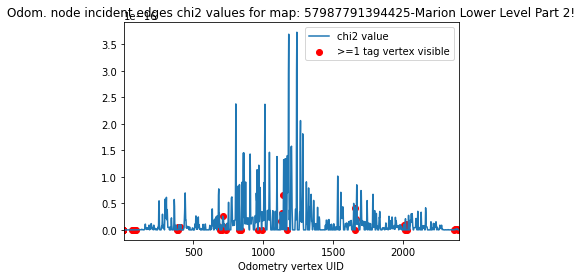

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [16]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=1, new_weights_specifier=2)

#### New weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 1872119.9604229995
checking optimized edges
Total chi2: 292.85947472079647
tag_vertex_shift [[ 1.74746310e-02 -2.49659046e-02  5.00277706e-01 -8.38283211e-03
   6.57188568e-03  4.60618759e-03  8.49342671e-03  0.00000000e+00]
 [ 1.65566245e-01  6.96942499e-02  5.30427369e-01 -1.62845670e-04
  -7.96661590e-04  5.22776470e-03 -9.72386040e-05  0.00000000e+00]
 [-2.43986316e-02 -5.71533138e-03  1.55676550e-02 -4.90214261e-03
   1.60661162e-02 -6.56909721e-04  1.80843764e-03  0.00000000e+00]
 [-1.40743264e-01 -1.79315071e-01  2.57553471e-01  1.91857394e-03
  -5.96810322e-03 -4.17383844e-04  4.94260261e-03  0.00000000e+00]
 [-7.95336995e-02  3.43973424e-02  5.73745406e-01  1.08702530e-03
  -3.79437585e-03 -5.01168410e-03 -2.78839703e-04  0.00000000e+00]]


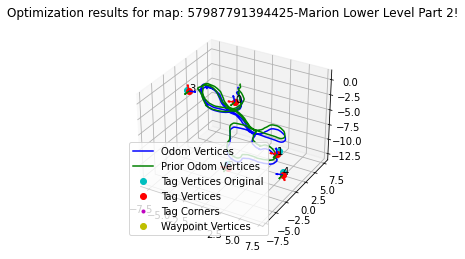

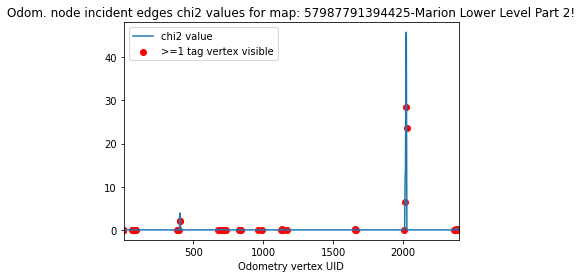

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [17]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=1, new_weights_specifier=3)

### Diagonal Covariance Prescaling

#### Default weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 28741.590182932425
checking optimized edges
Total chi2: 23.117056993628626
tag_vertex_shift [[ 3.84389651e-02  2.67307053e-01  2.40142982e-01 -3.71880963e-04
  -6.38989262e-03  3.25701796e-03 -7.82998014e-03  0.00000000e+00]
 [ 6.33475372e-01  5.15108210e-02  1.48316927e-01  1.24649683e-03
  -1.00335643e-02  9.08636864e-03 -9.08026646e-04  0.00000000e+00]
 [ 1.65084691e-01 -1.00246875e-01  4.96259323e-02 -7.31367338e-04
   9.79631645e-03 -1.56333122e-03  1.05010858e-03  0.00000000e+00]
 [-1.02054939e-01  1.86918258e+00 -1.31881163e-01 -3.06648482e-03
  -4.95697012e-03  3.32551884e-03  4.11182524e-03  0.00000000e+00]
 [ 5.23719409e-02  1.81906158e-01  1.37714153e-01 -7.84927213e-04
   7.69502779e-03  6.76734634e-03  6.56085897e-04  0.00000000e+00]]


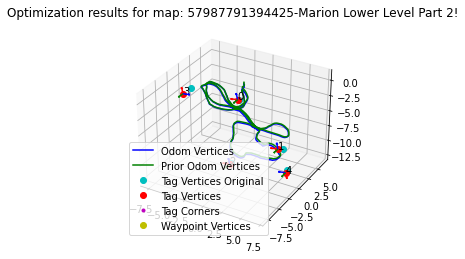

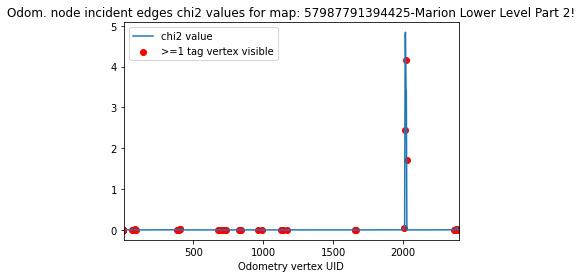

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [18]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=2, new_weights_specifier=0)

#### Prioritizing odometry nodes


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 41.01944362387483
checking optimized edges
Total chi2: 0.022585249000518382
tag_vertex_shift [[ 0.18382118  0.0981873   0.04799713 -0.00104793  0.00171786  0.01031844
   0.00234403  0.        ]
 [ 0.19652201  0.08951761  0.03838877  0.00157765  0.00278045  0.00535287
   0.00024303  0.        ]
 [ 0.00417115  0.0037876  -0.01063367  0.00034644  0.01596811 -0.0019964
   0.0017658   0.        ]
 [-0.04138751  0.07105182  0.08367245 -0.00361356  0.01911558 -0.00235455
  -0.01528972  0.        ]
 [ 0.01893643  0.10062047  0.11752286 -0.00500004  0.00574422 -0.00136891
   0.00047315  0.        ]]


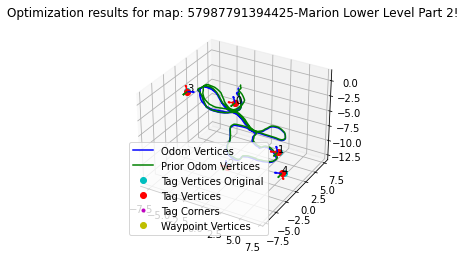

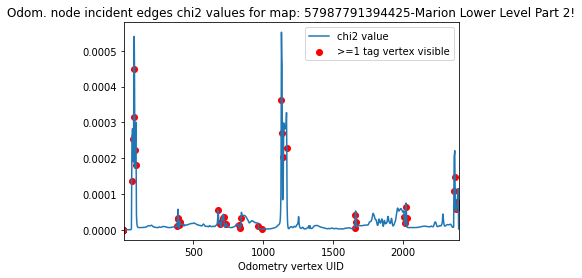

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [19]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=2, new_weights_specifier=1)

#### Prioritizing tag weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 430570670693.63153
checking optimized edges
Total chi2: 133532385432.60115
tag_vertex_shift [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.67361738e-19
   1.11022302e-16  1.73472348e-18  1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.38777878e-17  8.67361738e-19  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.16840434e-19
  -2.77555756e-17 -3.46944695e-18  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.71050543e-20
  -1.38777878e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


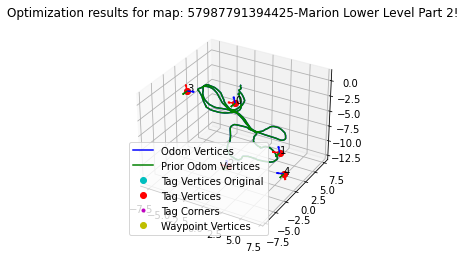

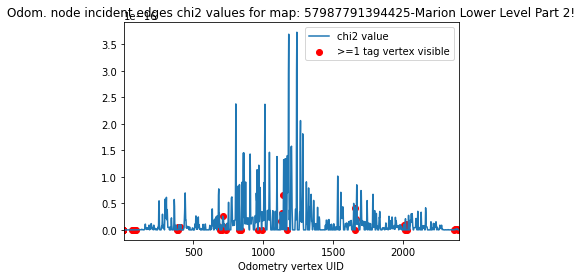

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [20]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=2, new_weights_specifier=2)

#### New weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 623811.2594637263
checking optimized edges
Total chi2: 57.91162019784093
tag_vertex_shift [[ 3.27942955e-02  1.72990082e-01  2.02372266e-01 -9.44454608e-03
   6.29574745e-03  3.08148427e-03  8.14594248e-03  0.00000000e+00]
 [ 1.84043317e-01  2.77683385e-01  2.45007129e-01  1.03258878e-03
  -4.64332194e-03  8.33668907e-03 -4.45689180e-04  0.00000000e+00]
 [-2.26128045e-02 -5.12112555e-03  1.45037493e-02 -4.53396605e-03
   1.31222049e-02 -9.97870726e-04  1.45371545e-03  0.00000000e+00]
 [-1.44181228e-01 -4.70689495e-02  8.48506534e-02  3.70385082e-03
   8.66300852e-03  6.39939873e-04 -7.05382712e-03  0.00000000e+00]
 [-7.62794168e-02  2.34188324e-01  2.68510926e-01  7.12347268e-04
  -1.78418201e-03 -3.90003629e-03 -1.33047156e-04  0.00000000e+00]]


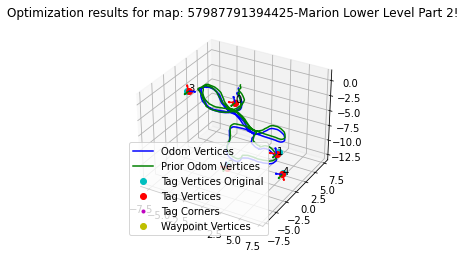

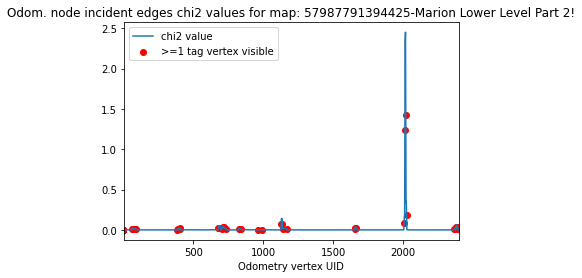

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [21]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=2, new_weights_specifier=3)

### Identity Prescaling

#### Default weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 1.245599055622623
checking optimized edges
Total chi2: 0.10417721129789966
tag_vertex_shift [[ 6.41937967e-02  3.17378566e+01  9.78622695e-02 -1.59987686e-03
  -3.08467421e-03  1.97439316e-03 -3.77822513e-03  0.00000000e+00]
 [-5.79069528e-02 -3.01812910e+01 -4.49531468e-02 -3.35764796e-04
  -3.82931709e-03  6.10351133e-03 -3.74957384e-04  0.00000000e+00]
 [ 1.77042925e-01 -3.93403183e+01 -1.21180108e-01  1.23581595e-04
   7.51376572e-03 -1.69754298e-03  7.90786498e-04  0.00000000e+00]
 [-1.46985318e-01  4.64571408e+01 -1.22610118e-01 -3.90642029e-04
  -4.32394627e-03 -3.05083946e-04  3.57957061e-03  0.00000000e+00]
 [ 9.83838237e-01  1.23993682e+01  1.59209365e-01 -2.19394221e-04
   3.63680660e-03  1.93200023e-03  2.92033104e-04  0.00000000e+00]]


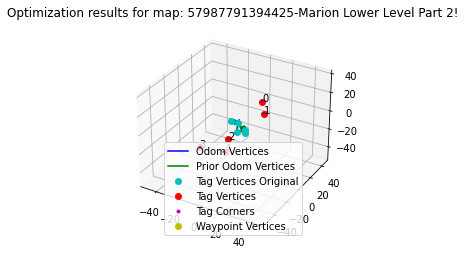

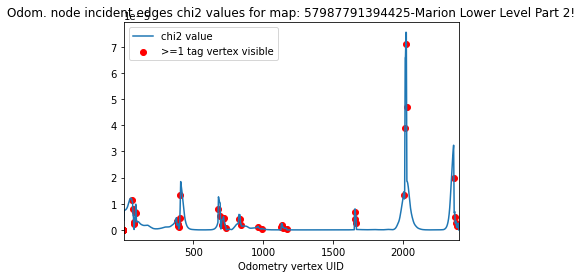

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [22]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=3, new_weights_specifier=0)

#### Prioritizing odometry nodes


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 6.023122194746224e-05
checking optimized edges
Total chi2: 3.2172614692178807e-05
tag_vertex_shift [[ 6.62542308e-02  2.31343209e-03 -2.93799015e-02 -2.14174279e-03
  -2.78503900e-03  1.75726270e-03 -3.40330173e-03  0.00000000e+00]
 [ 1.26942824e-01  2.45521426e-03 -3.06894543e-02 -4.62524445e-04
  -3.58145839e-03  5.63782506e-03 -3.52219399e-04  0.00000000e+00]
 [-5.59461491e-02 -1.20670053e-01 -1.82469782e-01  1.16286225e-04
   7.56643463e-03 -1.64493144e-03  7.97147325e-04  0.00000000e+00]
 [-1.40280413e-01 -6.59848096e-02 -7.39760066e-02 -1.40604502e-05
  -4.11276186e-03  2.75492954e-04  3.39896524e-03  0.00000000e+00]
 [-4.23279261e-02 -2.07385464e-03 -1.58042013e-02 -2.38160949e-04
   3.41967538e-03  1.64041614e-03  2.73616550e-04  0.00000000e+00]]


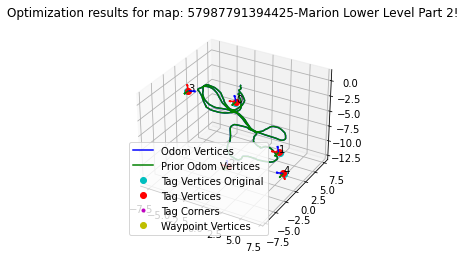

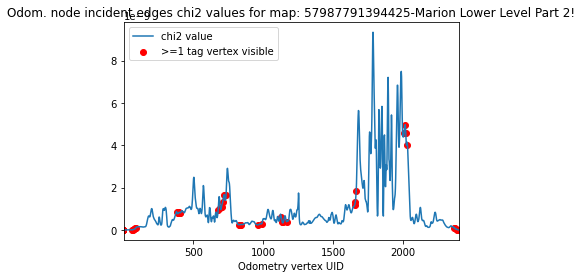

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [23]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=3, new_weights_specifier=1)

#### Prioritizing tag weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 364496435624.70917
checking optimized edges
Total chi2: 67458150363.67901
tag_vertex_shift [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.67361738e-19
   1.11022302e-16  1.73472348e-18  1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.38777878e-17  8.67361738e-19  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.16840434e-19
  -2.77555756e-17 -3.46944695e-18  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.71050543e-20
  -1.38777878e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


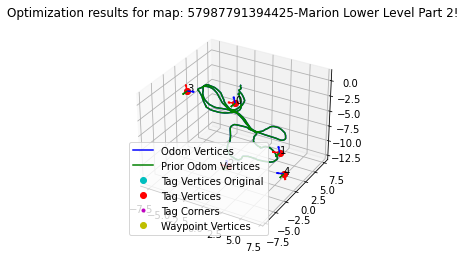

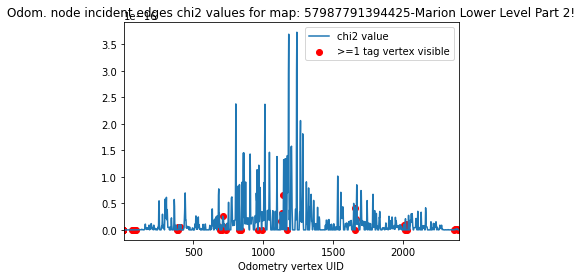

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [24]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=3, new_weights_specifier=2)

#### New weights


---- Attempting to process map /home/duncan/occam/invisible-map-generation/.cache/unprocessed_maps/myTestFolder/57987791394425-Marion Lower Level Part 2!.json ----
checking unoptimized edges
Total chi2: 1.6766098636998472
checking optimized edges
Total chi2: 0.1820696198662449
tag_vertex_shift [[ 2.25330790e-01  2.64630435e-01  2.05893927e-01  1.23246574e-04
  -3.71861769e-03  2.47523548e-03 -4.57496144e-03  0.00000000e+00]
 [ 2.61637216e-01  3.16718770e-01  2.47328538e-01  1.65465166e-03
  -1.09797082e-02  1.51006172e-02 -9.54775932e-04  0.00000000e+00]
 [ 1.57331227e-02 -3.25595069e-03 -1.96230537e-02 -9.67910334e-04
   8.58540326e-03 -1.50183199e-03  9.14237440e-04  0.00000000e+00]
 [-9.59477405e-02 -7.07078246e-03  7.16850551e-02 -8.13350205e-05
  -5.03897209e-03 -9.80947675e-05  4.17217335e-03  0.00000000e+00]
 [ 9.00025379e-02  2.57935330e-01  2.09299174e-01 -4.48005444e-05
   2.94557620e-03  7.33384132e-04  2.33260157e-04  0.00000000e+00]]


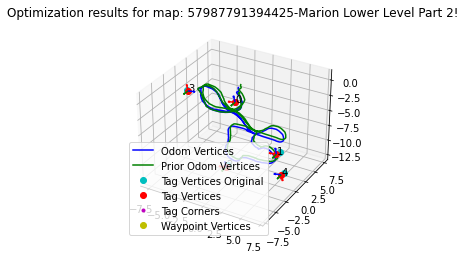

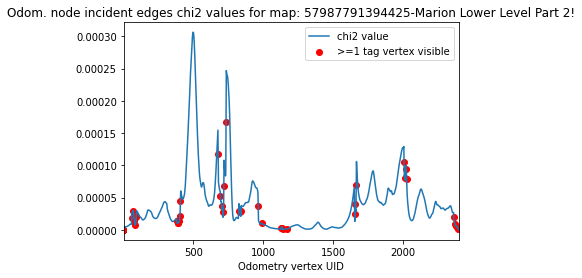

Processed map: 57987791394425-Marion Lower Level Part 2!
Successfully cached /home/duncan/occam/invisible-map-generation/.cache/TestProcessed/57987791394425-Marion Lower Level Part 2!.json


In [25]:
graph_manager.process_maps(map_pattern, visualize=visualize, compare=False, new_pso=3, new_weights_specifier=3)
